In [1]:
import os
print(os.getcwd())

C:\Users\jsait\Downloads


In [2]:
import pandas as pd
titanic_data = pd.read_csv('train.csv')
#display first 5 rows
titanic_data.head()
#check dataset dimensions
print("Dataset dimensions: {titanic_data.shape}")
#check basic info
titanic_data.info()
                           

Dataset dimensions: {titanic_data.shape}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#set visualization styles 
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 12       

In [8]:
# Get statistical summary of numerical columns
titanic_data.describe()

# Check for missing values
missing_values = titanic_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check value counts for categorical columns
print("\nPassenger class distribution:")
print(titanic_data['Pclass'].value_counts())

print("\nGender distribution:")
print(titanic_data['Sex'].value_counts())

print("\nSurvival distribution:")
print(titanic_data['Survived'].value_counts())
print(f"Survival rate: {titanic_data['Survived'].mean()*100:.2f}%")

print("\nEmbarkation port distribution:")
print(titanic_data['Embarked'].value_counts())

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Passenger class distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Gender distribution:
Sex
male      577
female    314
Name: count, dtype: int64

Survival distribution:
Survived
0    549
1    342
Name: count, dtype: int64
Survival rate: 38.38%

Embarkation port distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


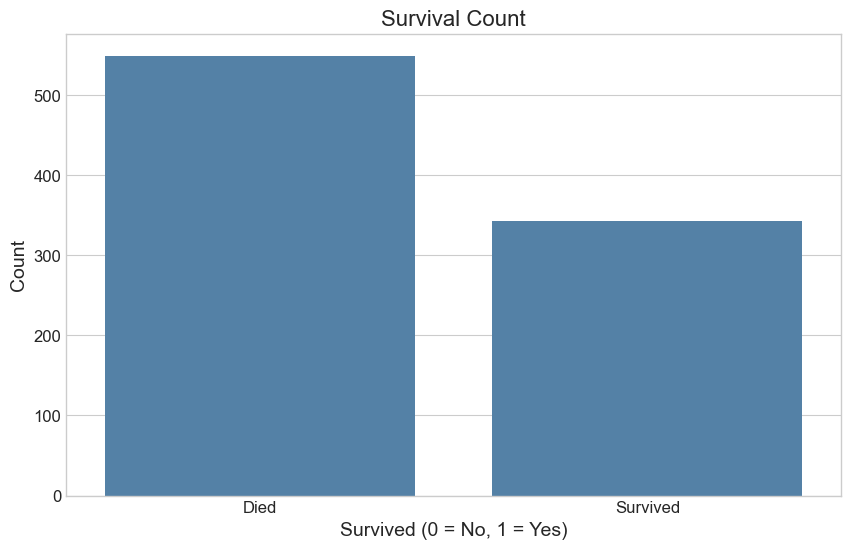

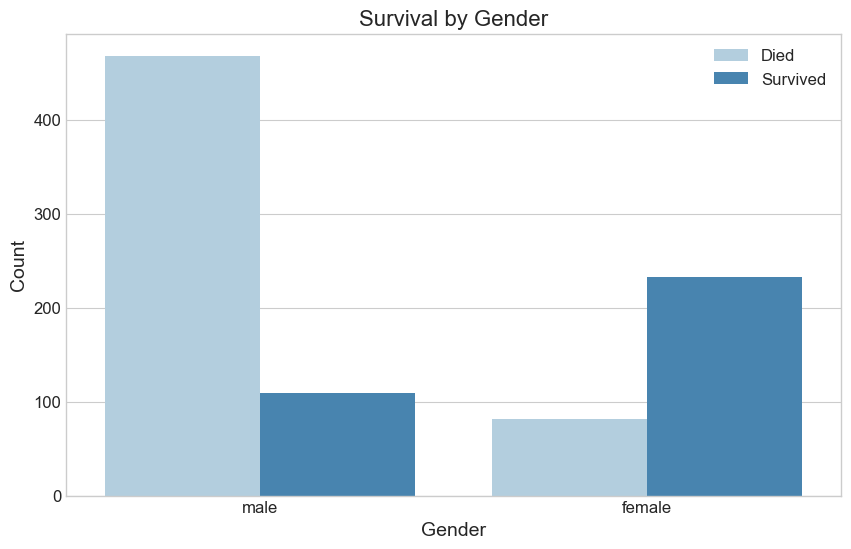


Survival Rate by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [22]:
# Plot 1: Overall survival count
plt.figure(figsize=(10, 6))
# CORRECTED LINE - use color instead of palette without hue
sns.countplot(x='Survived', data=titanic_data, color='steelblue')  
plt.title('Survival Count', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

# Plot 2: Survival by gender
plt.figure(figsize=(10, 6))
# This line is fine as it uses hue with palette
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='Blues')  
plt.title('Survival by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Died', 'Survived'])
plt.show()

# Calculate survival rates by gender
# CORRECTED LINE - add observed=True
gender_survival = titanic_data.groupby('Sex', observed=True)['Survived'].mean() * 100  
print("\nSurvival Rate by Gender:")
print(gender_survival) 


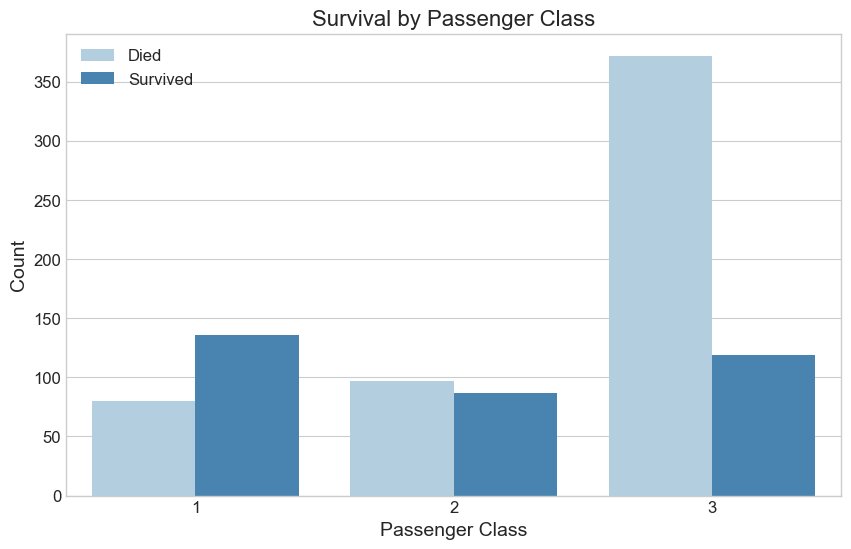


Survival Rate by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


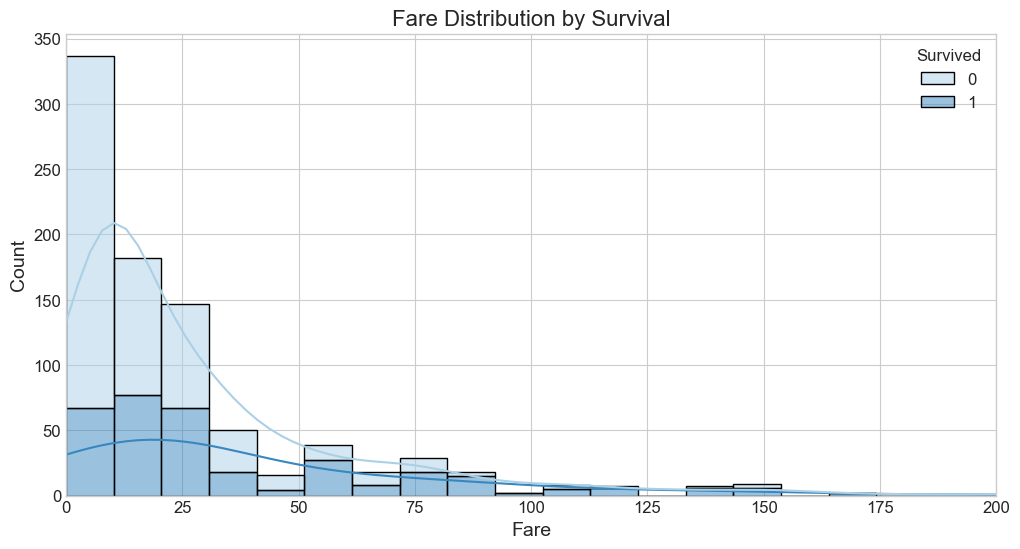

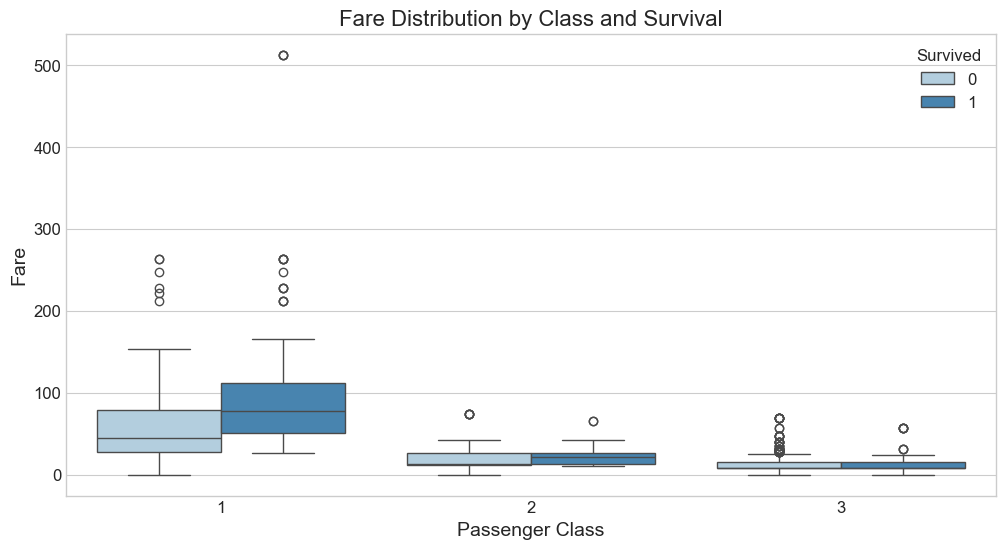

In [11]:
# Plot 3: Survival by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Died', 'Survived'])
plt.show()

# Calculate survival rates by class
class_survival = titanic_data.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Rate by Passenger Class:")
print(class_survival)

# Plot 4: Fare distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_data, x='Fare', bins=50, kde=True, hue='Survived', 
             multiple='stack', palette='Blues')
plt.title('Fare Distribution by Survival', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlim(0, 200)  # Limiting x-axis for better visualization
plt.show()

# Plot 5: Box plot of fare by class and survival
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Fare Distribution by Class and Survival', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.show()

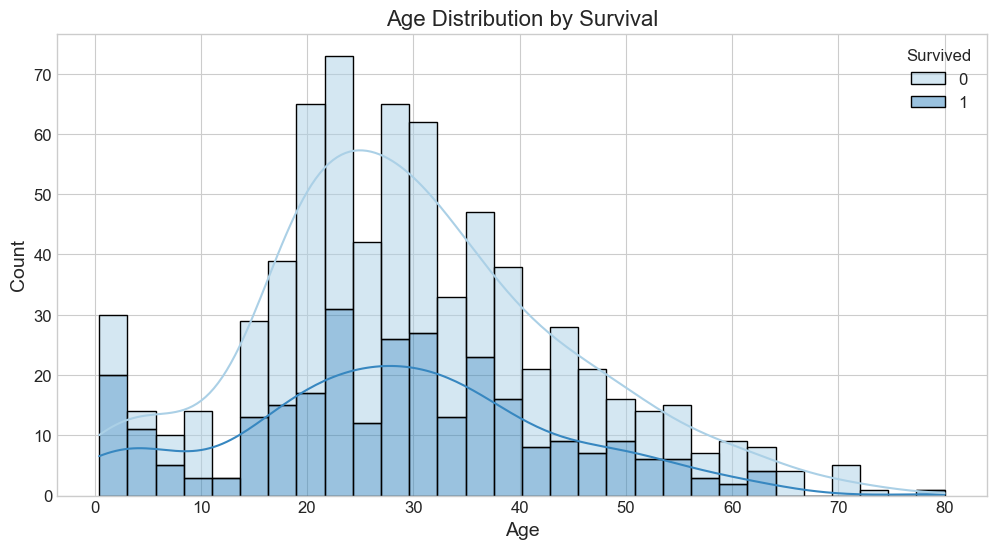

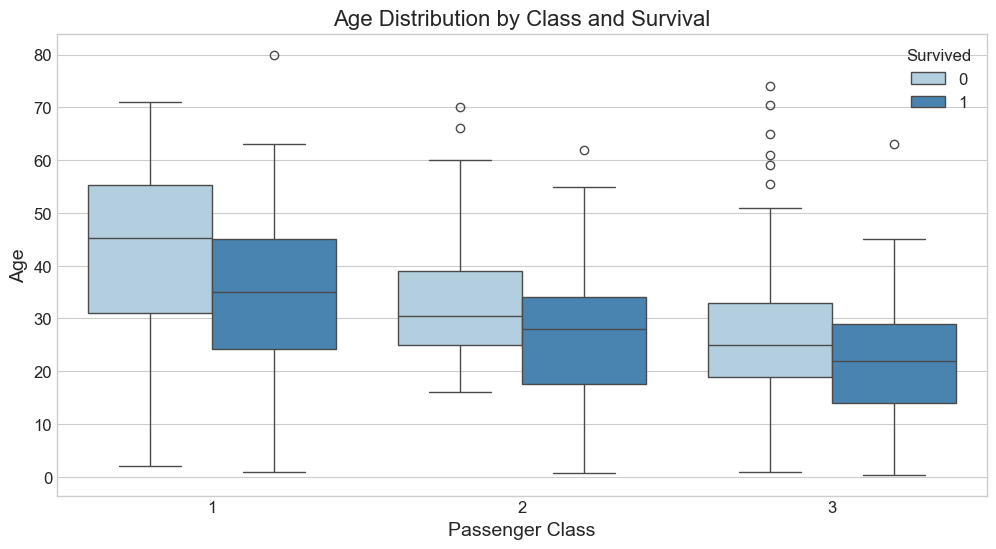

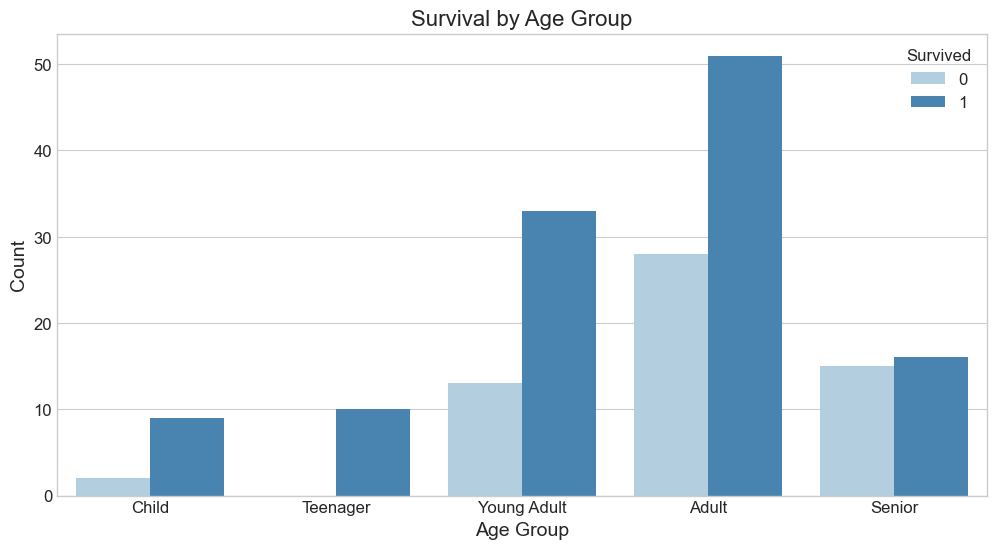


Survival Rate by Age Group:
AgeGroup
Child           81.818182
Teenager       100.000000
Young Adult     71.739130
Adult           64.556962
Senior          51.612903
Name: Survived, dtype: float64


In [23]:
# Plot 6: Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True, hue='Survived', 
             multiple='stack', palette='Blues')
plt.title('Age Distribution by Survival', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Plot 7: Age vs. Class boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Age Distribution by Class and Survival', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

# Create age groups
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], 
                                 bins=[0, 12, 18, 30, 50, 100], 
                                 labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Plot 8: Survival by age group
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=titanic_data.dropna(), palette='Blues')
plt.title('Survival by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Calculate survival rates by age group
# CORRECTED LINE - add observed=True
age_group_survival = titanic_data.dropna().groupby('AgeGroup', observed=True)['Survived'].mean() * 100
print("\nSurvival Rate by Age Group:")
print(age_group_survival)

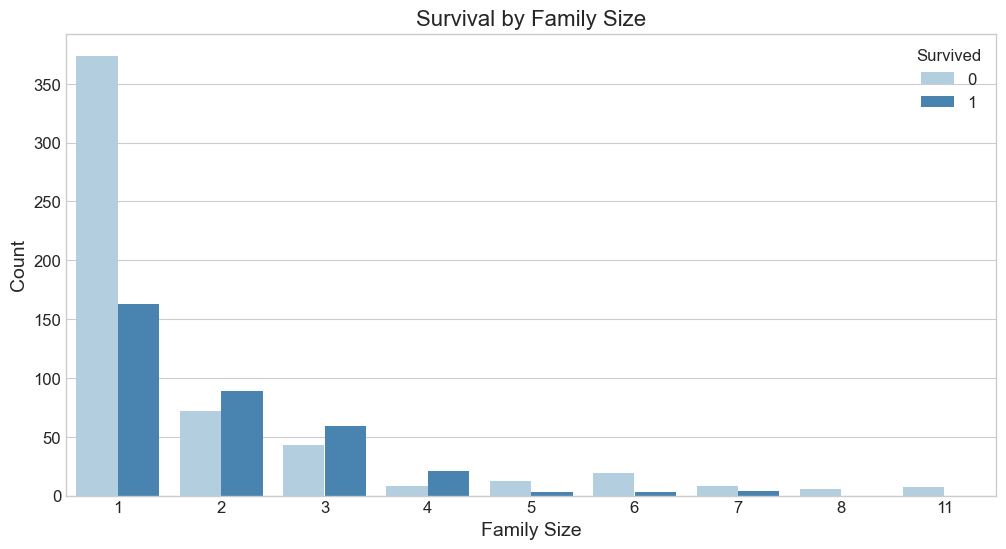


Survival Rate by Family Size:
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


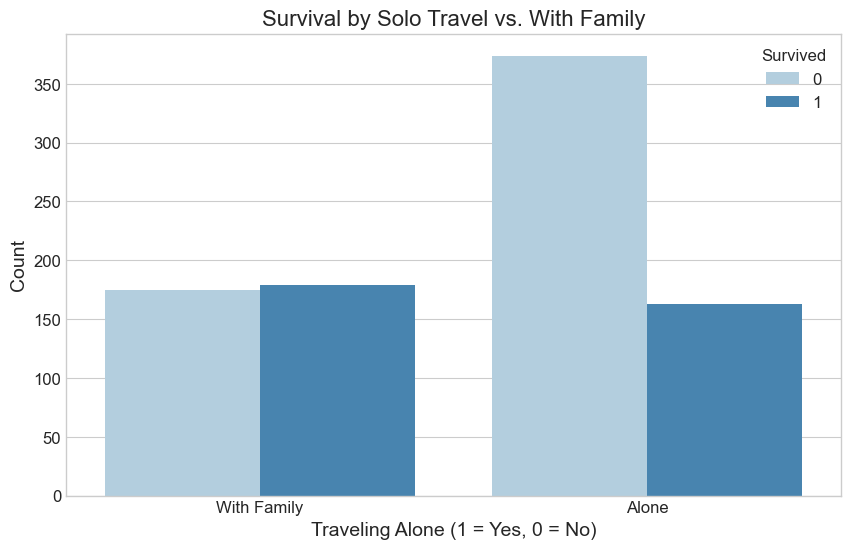


Survival Rate by Solo vs. Family Travel:
IsAlone
0    50.564972
1    30.353818
Name: Survived, dtype: float64


In [13]:
# Create family size feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Plot 9: Survival by family size
plt.figure(figsize=(12, 6))
sns.countplot(x='FamilySize', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Calculate survival rates by family size
family_survival = titanic_data.groupby('FamilySize')['Survived'].mean() * 100
print("\nSurvival Rate by Family Size:")
print(family_survival)

# Create a feature for traveling alone
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)

# Plot 10: Survival by traveling alone or with family
plt.figure(figsize=(10, 6))
sns.countplot(x='IsAlone', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival by Solo Travel vs. With Family', fontsize=16)
plt.xlabel('Traveling Alone (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.show()

# Calculate survival rates by solo vs family travel
alone_survival = titanic_data.groupby('IsAlone')['Survived'].mean() * 100
print("\nSurvival Rate by Solo vs. Family Travel:")
print(alone_survival)

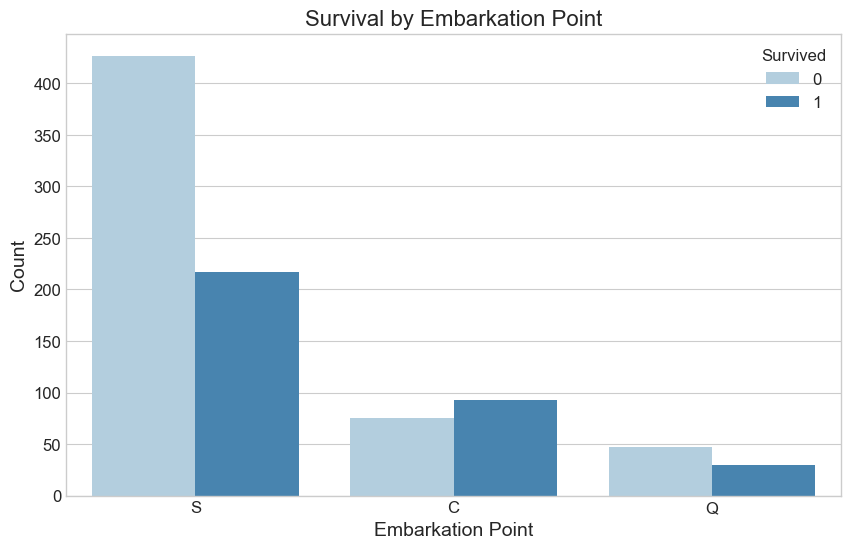


Survival Rate by Embarkation Point:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [14]:
# Plot 11: Survival by embarkation point
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival by Embarkation Point', fontsize=16)
plt.xlabel('Embarkation Point', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Calculate survival rates by embarkation
embarked_survival = titanic_data.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival Rate by Embarkation Point:")
print(embarked_survival)

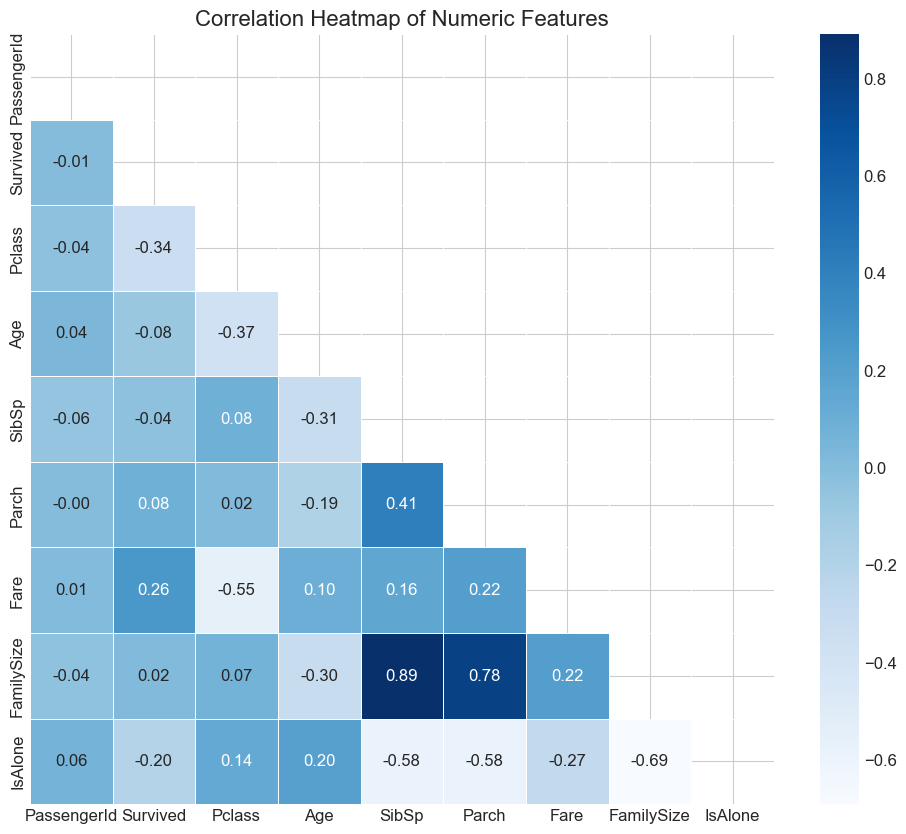

In [15]:
# Select only numeric columns
numeric_data = titanic_data.select_dtypes(include=[np.number])

# Calculate correlation
correlation = numeric_data.corr()

# Plot 12: Correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Blues', 
            mask=mask, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

Unique titles found:
Title
Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Planke           3
Impe             3
Gordon           2
Col              2
Mlle             2
Major            2
Melkebeke        1
Jonkheer         1
Shawah           1
the              1
Velde            1
Capt             1
Messemaeker      1
Carlo            1
Ms               1
Mme              1
Steen            1
Mulder           1
Pelsmaeker       1
Walle            1
der              1
Billiard         1
Don              1
Cruyssen         1
Name: count, dtype: int64


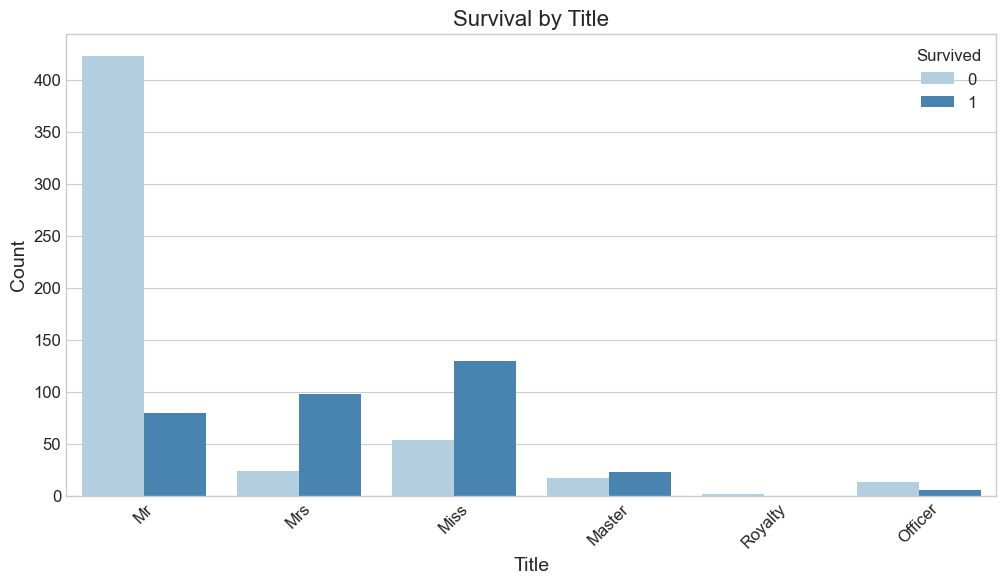


Survival Rate by Title:
Title
Master     57.500000
Miss       70.879121
Mr         15.737052
Mrs        80.327869
Officer    27.777778
Royalty     0.000000
Name: Survived, dtype: float64


In [19]:
# Extract titles from names
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)', expand=False)

# Check unique titles
print("Unique titles found:")
print(titanic_data['Title'].value_counts())

# Group rare titles
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Dr": "Officer",
    "Rev": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Mlle": "Miss",
    "Mme": "Mrs",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "Countess": "Royalty",
    "Jonkheer": "Royalty",
    "Dona": "Royalty",
    "Capt": "Officer",
    "Ms": "Miss"
}

titanic_data['Title'] = titanic_data['Title'].map(title_mapping)

# Plot 13: Survival by title
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=titanic_data, palette='Blues')
plt.title('Survival by Title', fontsize=16)
plt.xlabel('Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Calculate survival rates by title
title_survival = titanic_data.groupby('Title')['Survived'].mean() * 100
print("\nSurvival Rate by Title:")
print(title_survival)

<Figure size 1200x600 with 0 Axes>

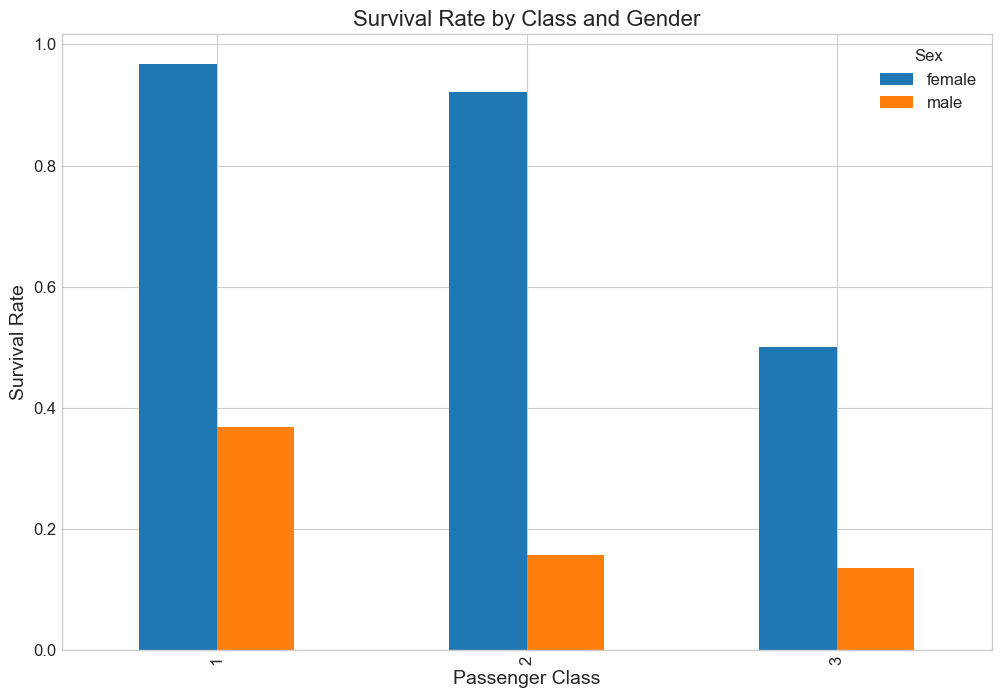


Survival Rate by Class and Gender:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [20]:
# Plot 14: Combined effects of class and gender on survival
plt.figure(figsize=(12, 6))
class_sex_survived = titanic_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
class_sex_survived.plot(kind='bar', stacked=False)
plt.title('Survival Rate by Class and Gender', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.show()

print("\nSurvival Rate by Class and Gender:")
print(class_sex_survived)

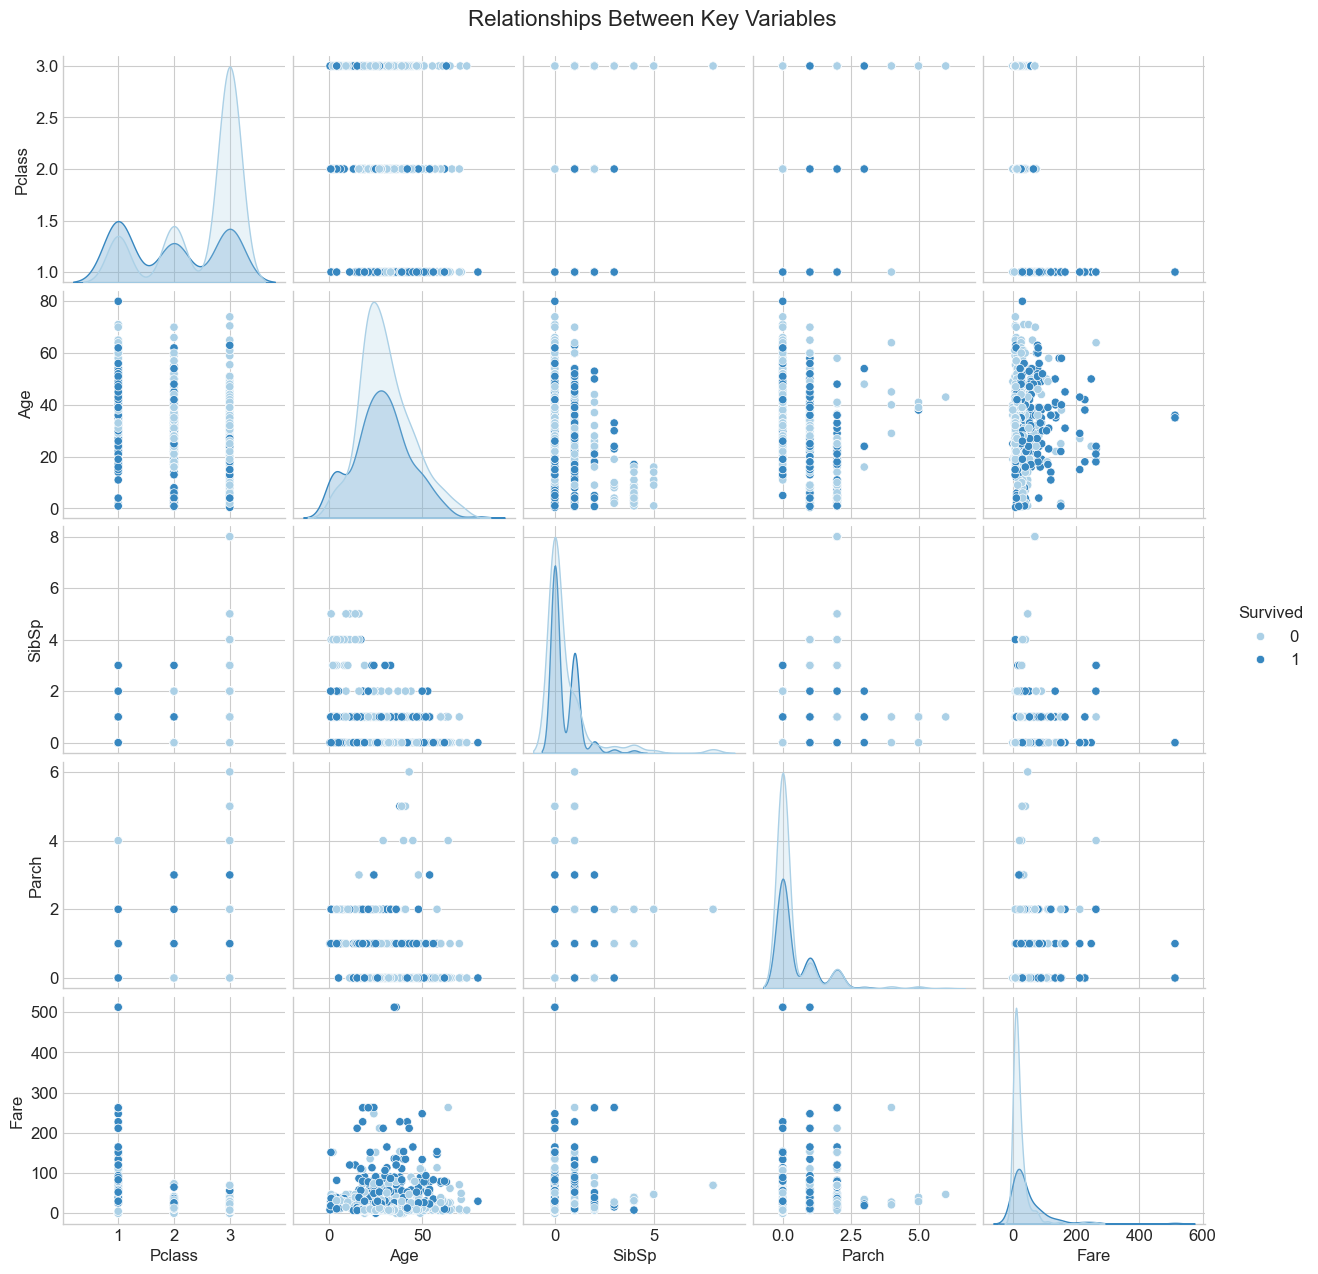

In [21]:
# Plot 15: Pairplot for key variables
sns.pairplot(titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], 
             hue='Survived', palette='Blues', diag_kind='kde')
plt.suptitle('Relationships Between Key Variables', y=1.02, fontsize=16)
plt.show()

# Summary of Findings

## Key Insights:

1. **Gender Effect**: 
   - Women had a dramatically higher survival rate (~74%) than men (~19%)
   - This reflects the "women and children first" evacuation policy

2. **Class Influence**:
   - First-class passengers had almost 3x higher survival rates (~63%) than third-class (~24%)
   - Social status significantly affected survival chances

3. **Age Patterns**:
   - Children had higher survival rates, especially in higher passenger classes
   - Young adult males had the lowest survival rates

4. **Family Size Impact**:
   - Medium-sized families (2-4 members) had better survival rates
   - Solo travelers and very large families had lower survival rates

5. **Economic Factors**:
   - Higher fare correlates positively with survival
   - This relates to passenger class and cabin location on the ship

6. **Embarkation Effect**:
   - Passengers who embarked from Cherbourg had higher survival rates
   - This may reflect differences in socioeconomic status among embarkation ports

7. **Title Analysis**:
   - Titles indicating nobility/status and females had higher survival rates
   - "Mr" had very low survival rates compared to other titles

## Strongest Predictors of Survival:
- Gender (Sex)
- Passenger Class (Pclass)
- Fare
- Age (particularly for children)
- Family Size (medium-sized families fared better)

These findings demonstrate that survival aboard the Titanic was heavily influenced by demographic and socioeconomic factors rather than being purely random.